# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp32 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325829583330025473
1325829583241961476
1325829583707529218
1325829583665582081
1325829583686365184
1325829584907104261
1325829586005975041
1325829586823868416
1325829587083829248
1325829587411103746
1325829587591426051
1325829588430303234
1325829588593889280
1325829588627369984
1325829589092982786
1325829589676011520
1325829590531629057
1325829590787502082
1325829590548439043
1325829590938497026
1325829591085293568
1325829591567638528
1325829592049983489
1325829592029028354
1325829592561709056
1325829592821723136
1325829592947564545
1325829593148739585
1325829593073324032
1325829593165656065
1325829593664684033
1325829593643814912
1325829594344255490
1325829594805661696
1325829596005228545
1325829595585683456
1325829596349149189
1325829596692901889
1325829596172996608
1325829596856676355
1325829597682950144
1325829597657591808
1325829597821284352
1325829598148431872
1325829598731493379
1325829598987382785
1325829599142547456
1325829598089670658
1325829599763296256
1325829599939325954


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 09 15:39:43 +0000 2020'
'Mon Nov 09 15:35:47 +0000 2020'
'Mon Nov 09 15:33:02 +0000 2020'
'Mon Nov 09 15:30:29 +0000 2020'
'Mon Nov 09 15:30:12 +0000 2020'
'Mon Nov 09 15:23:39 +0000 2020'
'Mon Nov 09 15:17:29 +0000 2020'
'Mon Nov 09 15:15:05 +0000 2020'
'Mon Nov 09 15:13:44 +0000 2020'
'Mon Nov 09 15:12:43 +0000 2020'
'Mon Nov 09 15:04:13 +0000 2020'
'Mon Nov 09 15:04:05 +0000 2020'
'Mon Nov 09 15:00:00 +0000 2020'
'Mon Nov 09 14:59:38 +0000 2020'
'Mon Nov 09 14:57:59 +0000 2020'
'Mon Nov 09 14:55:04 +0000 2020'
'Mon Nov 09 14:50:40 +0000 2020'
'Mon Nov 09 14:50:31 +0000 2020'
'Mon Nov 09 14:50:01 +0000 2020'
'Mon Nov 09 14:48:12 +0000 2020'
'Mon Nov 09 14:46:27 +0000 2020'
'Mon Nov 09 14:45:18 +0000 2020'
'Mon Nov 09 14:42:56 +0000 2020'
'Mon Nov 09 14:42:34 +0000 2020'
'Mon Nov 09 14:41:26 +0000 2020'
'Mon Nov 09 14:37:43 +0000 2020'
'Mon Nov 09 14:33:19 +0000 2020'
'Mon Nov 09 14:31:32 +0000 2020'
'Mon Nov 09 14:28:38 +0000 2020'
'Mon Nov 09 14:25:06 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 09 11:55:17 +0000 2020'
'Mon Nov 09 11:55:17 +0000 2020'
'Mon Nov 09 11:55:17 +0000 2020'
'Mon Nov 09 11:55:17 +0000 2020'
'Mon Nov 09 11:55:17 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:16 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:15 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:14 +0000 2020'
'Mon Nov 09 11:55:13 +0000 2020'
'Mon Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [11]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

22537
19380


Create a text index and print the Tweets containing specific keywords. 

In [12]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [13]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [14]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Patro
text: RT @DavidBegnaud: The election has taken attention away from COVID19. Thousands who celebrated the projected election of Joe Biden did not…
----
name: Rini
text: RT @DavidBegnaud: The election has taken attention away from COVID19. Thousands who celebrated the projected election of Joe Biden did not…
----
name: Alia Papageorgiou 🗞️ #stayathome 😷
text: RT @SKyriakidesEU: My warmest congratulations to 
🇺🇸 President-elect @JoeBiden and VP-elect @KamalaHarris. 

I look forward to working with…
----
name: Tonisha Johnson
text: RT @TaylorPopielarz: Just in:

President-elect @JoeBiden and VP-elect @KamalaHarris announce their #COVID19 task force. It’s actually 13 me…
----
name: Michael Mathes
text: President-elect @JoeBiden and VP-elect @KamalaHarris are now participating in a #COVID19 briefing in Wilmington bef… https://t.co/9YQ7kpDlhY
----
name: Donna Young
text: In addition, President-elect @JoeBiden and Vice President-elect @KamalaHarris said they plan to ask every 

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [16]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,metadata,quoted_status_id,quoted_status_id_str,extended_tweet,quoted_status,quoted_status_permalink,display_text_range,extended_entities,possibly_sensitive
0,5fa9661553bcb3dac519ab7f,Mon Nov 09 15:53:52 +0000 2020,1325828963554504707,1325828963554504707,RT @DavidBegnaud: The election has taken atten...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604937232279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa9650053bcb3dac5199f01,Mon Nov 09 15:49:15 +0000 2020,1325827801681960962,1325827801681960962,RT @DavidBegnaud: The election has taken atten...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604936955267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa96730dc95d30cec99c538,Mon Nov 09 11:23:06 +0000 2020,1325760822539325440,1325760822539325440,RT @SKyriakidesEU: My warmest congratulations ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",1.325413e+18,1325413292697907200,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa966d9dc95d30cec99a407,Mon Nov 09 11:54:00 +0000 2020,1325768599110299648,1325768599110299648,RT @TaylorPopielarz: Just in:\n\nPresident-ele...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa965ab53bcb3dac519a6d7,Mon Nov 09 15:52:06 +0000 2020,1325828517825744896,1325828517825744896,President-elect @JoeBiden and VP-elect @Kamala...,"<a href=""https://about.twitter.com/products/tw...",True,NaN,None,NaN,...,1604937126009,NaN,NaN,NaN,{'full_text': 'President-elect @JoeBiden and V...,NaN,NaN,NaN,NaN,NaN
5,5fa96705dc95d30cec99b4d4,Mon Nov 09 11:39:54 +0000 2020,1325765053258346497,1325765053258346497,"In addition, President-elect @JoeBiden and Vic...","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.325764e+18,1325763636950949888,593813785.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa966c053bcb3dac519b3eb,Mon Nov 09 15:56:43 +0000 2020,1325829680784609281,1325829680784609281,Why do they keep electing liars?,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604937403280,NaN,1.325819e+18,1325818840798916609,NaN,{'created_at': 'Mon Nov 09 15:13:38 +0000 2020...,"{'url': 'https://t.co/LTbIlAIyCQ', 'expanded':...",NaN,NaN,NaN
7,5fa9665453bcb3dac519ae5c,Mon Nov 09 15:54:55 +0000 2020,1325829227225223169,1325829227225223169,Agenda is on election now,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604937295143,NaN,1.325822e+18,1325822083377504267,NaN,{'created_at': 'Mon Nov 09 15:26:31 +0000 2020...,"{'url': 'https://t.co/3GjITpkDWl', 'expanded':...",NaN,NaN,NaN
8,5fa9640a53bcb3dac51993cc,Mon Nov 09 15:45:08 +0000 2020,1325826768658423809,1325826768658423809,Anyone else find suspicious that this after th...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604936708975,NaN,1.325781e+18,1325781099277152256,NaN,{'created_at': 'Mon Nov 09 12:43:40 +0000 2020...,"{'url': 'https://t.co/s9AaNjEQBV', 'expanded':...",NaN,NaN,NaN
9,5fa9673cdc95d30cec99c9d9,Mon Nov 09 11:18:07 +0000 2020,1325759567800758273,1325759567800758273,Thank goodness #COVID19 miraculously disappear...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


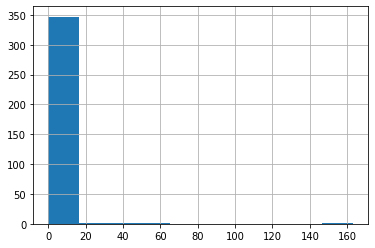

In [17]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count